## Reading, Manipulation and Plotting the Data

In [28]:
## Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime, timedelta
from sklearn.metrics import r2_score

In [2]:
## Read CSV file
url = 'https://raw.githubusercontent.com/mhenson1989/group_one_project/NYu/TX%20House%20Values%20over%20time%20zip.csv'
#df = pd.read_csv(url)
df = pd.read_csv(url, dtype={'RegionName': 'str'})
df

,RegionName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,8/31/2000,9/30/2000,...,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022
0,79403,32939.0,32819.0,32908.0,33127.0,33541.0,33874.0,34291.0,34596.0,35007.0,...,81830,82757,83546,85644.0,87724,90257,92485,94171,94996,94620
1,75980,33173.0,33404.0,33593.0,33836.0,34070.0,34767.0,35117.0,35263.0,34776.0,...,123723,125969,127924,130569.0,131481,132646,133561,135637,137956,139325
2,79411,45828.0,45646.0,45791.0,46009.0,46344.0,46559.0,46784.0,46941.0,47170.0,...,102992,104704,106392,108048.0,110137,112134,114370,115701,117232,117755
3,75949,46178.0,46332.0,46137.0,46167.0,46425.0,47796.0,49335.0,50274.0,50773.0,...,161877,164993,168291,172345.0,174034,175875,176852,179175,181301,183279
4,79415,51660.0,51692.0,51845.0,52349.0,52947.0,53249.0,53303.0,53072.0,53098.0,...,98239,99464,100730,103124.0,104745,106491,107201,108315,109210,109093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,78593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94685,95340,95987,95852.0,96874,98047,101072,103831,107976,109251
591,78575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,250089,253099,256677,260824.0,267934,274568,280503,285042,290682,296174
592,77650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,404201,412530,419493,427926.0,440928,458189,475500,486589,490875,494855
593,78535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,108774,110889,112361,110936.0,111272,112848,116684,119472,120078,119410


In [3]:
df.dtypes

RegionName     object
1/31/2000     float64
2/29/2000     float64
3/31/2000     float64
4/30/2000     float64
               ...   
4/30/2022       int64
5/31/2022       int64
6/30/2022       int64
7/31/2022       int64
8/31/2022       int64
Length: 273, dtype: object

In [4]:
# Set RegionName as index 
df1 = df.set_index('RegionName')

# Transpose and set index label to Date
df1 = df1.transpose().rename_axis(None, axis=1).rename_axis("Date", axis=0)
df1

,79403,75980,79411,75949,79415,78207,79401,79311,79404,75901,...,77518,77554,78578,78583,77517,78593,78575,77650,78535,78592
Date,,,,,,,,,,,,,,,,,,,,,
1/31/2000,32939.0,33173.0,45828.0,46178.0,51660.0,52396.0,53756.0,57034.0,57307.0,59803.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/29/2000,32819.0,33404.0,45646.0,46332.0,51692.0,52440.0,53512.0,55989.0,57180.0,59915.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/31/2000,32908.0,33593.0,45791.0,46137.0,51845.0,52664.0,53527.0,56150.0,57187.0,60050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/30/2000,33127.0,33836.0,46009.0,46167.0,52349.0,52860.0,53477.0,56602.0,57278.0,60324.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5/31/2000,33541.0,34070.0,46344.0,46425.0,52947.0,52548.0,53545.0,57522.0,57724.0,60688.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/30/2022,90257.0,132646.0,112134.0,175875.0,106491.0,144510.0,138537.0,131561.0,88527.0,155094.0,...,217418.0,618618.0,261908.0,176773.0,362499.0,98047.0,274568.0,458189.0,112848.0,77389.0
5/31/2022,92485.0,133561.0,114370.0,176852.0,107201.0,146316.0,140385.0,132958.0,89655.0,156056.0,...,220753.0,635509.0,269464.0,180598.0,366730.0,101072.0,280503.0,475500.0,116684.0,77898.0
6/30/2022,94171.0,135637.0,115701.0,179175.0,108315.0,146794.0,141974.0,135373.0,90934.0,158386.0,...,222481.0,646978.0,274625.0,183298.0,369614.0,103831.0,285042.0,486589.0,119472.0,78138.0


In [5]:
# Reset index to check data types 
df1 = df1.reset_index()
df1

,Date,79403,75980,79411,75949,79415,78207,79401,79311,79404,...,77518,77554,78578,78583,77517,78593,78575,77650,78535,78592
0,1/31/2000,32939.0,33173.0,45828.0,46178.0,51660.0,52396.0,53756.0,57034.0,57307.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/29/2000,32819.0,33404.0,45646.0,46332.0,51692.0,52440.0,53512.0,55989.0,57180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/31/2000,32908.0,33593.0,45791.0,46137.0,51845.0,52664.0,53527.0,56150.0,57187.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4/30/2000,33127.0,33836.0,46009.0,46167.0,52349.0,52860.0,53477.0,56602.0,57278.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5/31/2000,33541.0,34070.0,46344.0,46425.0,52947.0,52548.0,53545.0,57522.0,57724.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,4/30/2022,90257.0,132646.0,112134.0,175875.0,106491.0,144510.0,138537.0,131561.0,88527.0,...,217418.0,618618.0,261908.0,176773.0,362499.0,98047.0,274568.0,458189.0,112848.0,77389.0
268,5/31/2022,92485.0,133561.0,114370.0,176852.0,107201.0,146316.0,140385.0,132958.0,89655.0,...,220753.0,635509.0,269464.0,180598.0,366730.0,101072.0,280503.0,475500.0,116684.0,77898.0
269,6/30/2022,94171.0,135637.0,115701.0,179175.0,108315.0,146794.0,141974.0,135373.0,90934.0,...,222481.0,646978.0,274625.0,183298.0,369614.0,103831.0,285042.0,486589.0,119472.0,78138.0
270,7/31/2022,94996.0,137956.0,117232.0,181301.0,109210.0,145744.0,144126.0,137386.0,91523.0,...,222900.0,653441.0,278739.0,183748.0,370096.0,107976.0,290682.0,490875.0,120078.0,78670.0


In [6]:
# Checking data types
df1.dtypes

Date      object
79403    float64
75980    float64
79411    float64
75949    float64
          ...   
78593    float64
78575    float64
77650    float64
78535    float64
78592    float64
Length: 596, dtype: object

In [7]:
# Converting Date column dtype from object to datetime values
df1['Date'] = pd.to_datetime(df1['Date'])

In [8]:
df1.dtypes

Date     datetime64[ns]
79403           float64
75980           float64
79411           float64
75949           float64
              ...      
78593           float64
78575           float64
77650           float64
78535           float64
78592           float64
Length: 596, dtype: object

In [9]:
# # Set Date column as Index 
df1 = df1.set_index('Date')
df1

,79403,75980,79411,75949,79415,78207,79401,79311,79404,75901,...,77518,77554,78578,78583,77517,78593,78575,77650,78535,78592
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,32939.0,33173.0,45828.0,46178.0,51660.0,52396.0,53756.0,57034.0,57307.0,59803.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,32819.0,33404.0,45646.0,46332.0,51692.0,52440.0,53512.0,55989.0,57180.0,59915.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,32908.0,33593.0,45791.0,46137.0,51845.0,52664.0,53527.0,56150.0,57187.0,60050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,33127.0,33836.0,46009.0,46167.0,52349.0,52860.0,53477.0,56602.0,57278.0,60324.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,33541.0,34070.0,46344.0,46425.0,52947.0,52548.0,53545.0,57522.0,57724.0,60688.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,90257.0,132646.0,112134.0,175875.0,106491.0,144510.0,138537.0,131561.0,88527.0,155094.0,...,217418.0,618618.0,261908.0,176773.0,362499.0,98047.0,274568.0,458189.0,112848.0,77389.0
2022-05-31,92485.0,133561.0,114370.0,176852.0,107201.0,146316.0,140385.0,132958.0,89655.0,156056.0,...,220753.0,635509.0,269464.0,180598.0,366730.0,101072.0,280503.0,475500.0,116684.0,77898.0
2022-06-30,94171.0,135637.0,115701.0,179175.0,108315.0,146794.0,141974.0,135373.0,90934.0,158386.0,...,222481.0,646978.0,274625.0,183298.0,369614.0,103831.0,285042.0,486589.0,119472.0,78138.0


## Plotting Data for each zip code

<Figure size 2400x1200 with 0 Axes>

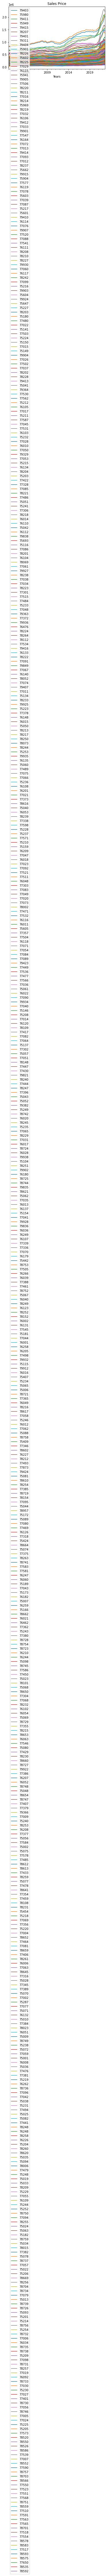

In [10]:
# Visualizing The House Sales Price by zip code
# Set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using .plot method to plot House Sales Price.
df1.plot(label='df1')
  
# adding title
plt.title('Sales Price')
  
# adding label to x-axis
plt.xlabel('Years')
  
# adding legend.
plt.legend()

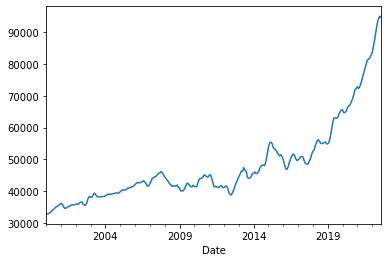

In [11]:
# Visualizing The House Sales Price for only 77449 Zip Code
  
# using .plot method to plot House Sales Price.
df1['79403'].plot()

plt.show()

# Machine Learning - Linear Regression

In [12]:
# Setting and creating new dataframe. Accounting for all available data. Initial thought was to slice dataframe 
# based on recent historical data, however this latest data is been influenced by COVID pandemic and the objective 
# of the project is to predict long term house value 
df2 = df1['2000-1-31' :'2022-8-31']
df2

,79403,75980,79411,75949,79415,78207,79401,79311,79404,75901,...,77518,77554,78578,78583,77517,78593,78575,77650,78535,78592
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,32939.0,33173.0,45828.0,46178.0,51660.0,52396.0,53756.0,57034.0,57307.0,59803.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,32819.0,33404.0,45646.0,46332.0,51692.0,52440.0,53512.0,55989.0,57180.0,59915.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,32908.0,33593.0,45791.0,46137.0,51845.0,52664.0,53527.0,56150.0,57187.0,60050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,33127.0,33836.0,46009.0,46167.0,52349.0,52860.0,53477.0,56602.0,57278.0,60324.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,33541.0,34070.0,46344.0,46425.0,52947.0,52548.0,53545.0,57522.0,57724.0,60688.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,90257.0,132646.0,112134.0,175875.0,106491.0,144510.0,138537.0,131561.0,88527.0,155094.0,...,217418.0,618618.0,261908.0,176773.0,362499.0,98047.0,274568.0,458189.0,112848.0,77389.0
2022-05-31,92485.0,133561.0,114370.0,176852.0,107201.0,146316.0,140385.0,132958.0,89655.0,156056.0,...,220753.0,635509.0,269464.0,180598.0,366730.0,101072.0,280503.0,475500.0,116684.0,77898.0
2022-06-30,94171.0,135637.0,115701.0,179175.0,108315.0,146794.0,141974.0,135373.0,90934.0,158386.0,...,222481.0,646978.0,274625.0,183298.0,369614.0,103831.0,285042.0,486589.0,119472.0,78138.0


<AxesSubplot:xlabel='Date'>

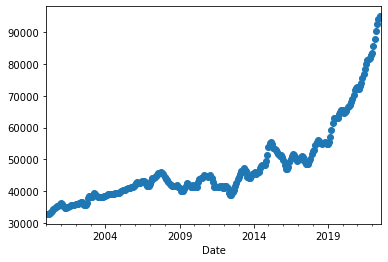

In [13]:
# Visualizing The House Sales Price for only 77449 Zip Code
df2['79403'].plot(marker='o', ls='')

In [21]:
# Reshaping the X (corresponding dates to Sale Price) into an array. All dates are passed through pandas 
#‘to_datetime()’ function to convert it to float numeric for regression purpose. index.values is chained since dates
# is the index of the dataframe
X = np.array(pd.to_datetime(df2['79403']).index.values, dtype=float).reshape(-1, 1)
X

array([[9.4927680e+17],
       [9.5178240e+17],
       [9.5446080e+17],
       [9.5705280e+17],
       [9.5973120e+17],
       [9.6232320e+17],
       [9.6500160e+17],
       [9.6768000e+17],
       [9.7027200e+17],
       [9.7295040e+17],
       [9.7554240e+17],
       [9.7822080e+17],
       [9.8089920e+17],
       [9.8331840e+17],
       [9.8599680e+17],
       [9.8858880e+17],
       [9.9126720e+17],
       [9.9385920e+17],
       [9.9653760e+17],
       [9.9921600e+17],
       [1.0018080e+18],
       [1.0044864e+18],
       [1.0070784e+18],
       [1.0097568e+18],
       [1.0124352e+18],
       [1.0148544e+18],
       [1.0175328e+18],
       [1.0201248e+18],
       [1.0228032e+18],
       [1.0253952e+18],
       [1.0280736e+18],
       [1.0307520e+18],
       [1.0333440e+18],
       [1.0360224e+18],
       [1.0386144e+18],
       [1.0412928e+18],
       [1.0439712e+18],
       [1.0463904e+18],
       [1.0490688e+18],
       [1.0516608e+18],
       [1.0543392e+18],
       [1.056931

In [22]:
# The shape of X is 22 samples, with a single feature (column)
X.shape

(272, 1)

In [23]:
# The y variable is the Sales Price for 77449 zip code
y = np.array(df2['79403'].values)
y

array([32939., 32819., 32908., 33127., 33541., 33874., 34291., 34596.,
       35007., 35161., 35451., 35811., 36112., 35936., 35160., 34629.,
       34572., 34882., 35140., 35275., 35528., 35688., 35639., 35745.,
       35823., 35933., 35837., 36313., 36466., 36612., 35887., 35600.,
       35553., 36321., 37671., 38315., 38079., 38062., 38669., 39350.,
       39043., 38400., 38156., 38134., 38225., 38247., 38238., 38300.,
       38527., 38759., 39051., 38942., 39098., 39023., 39192., 39219.,
       39368., 39417., 39349., 39414., 39770., 40129., 40404., 40244.,
       40431., 40507., 40912., 40928., 41122., 41239., 41424., 41654.,
       42060., 42454., 42735., 42587., 42650., 42775., 43022., 43242.,
       42815., 42215., 41527., 41671., 42307., 43111., 44053., 44232.,
       44500., 44608., 45178., 45586., 45701., 46116., 45706., 45239.,
       44423., 43931., 43482., 42983., 42262., 41975., 41475., 41695.,
       41593., 41575., 41883., 41278., 40892., 40064., 40017., 40115.,
      

In [24]:
# Create linear regression model with scikit-learn
model = LinearRegression()

In [25]:
# Fit data into the model
model.fit(X, y)

LinearRegression()

In [26]:
# The model creates predicted y values based on X values
y_pred = model.predict(X)
print(y_pred.shape)

(272,)


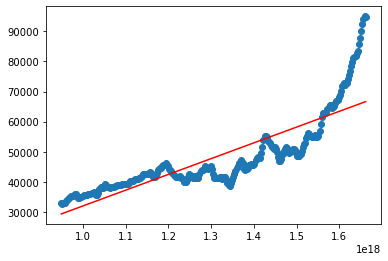

Slope: [5.23278395e-14]
Intercept: -20307.684832801882
R2 score: 0.7123477643534873


In [29]:
# Plotting the results
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

print('Slope:', model.coef_)
print('Intercept:', model.intercept_)
print('R2 score:', r2_score(y, y_pred))

In [31]:
# slice dataframe for 3 columns only
df3 = df2[['79403', '79411']].copy() 
df3

,79403,79411
Date,,
2000-01-31,32939.0,45828.0
2000-02-29,32819.0,45646.0
2000-03-31,32908.0,45791.0
2000-04-30,33127.0,46009.0
2000-05-31,33541.0,46344.0
...,...,...
2022-04-30,90257.0,112134.0
2022-05-31,92485.0,114370.0
2022-06-30,94171.0,115701.0


In [33]:
# For loop to go over each column in dataframe
for column in df3:
    #print(df[column])
    y = np.array(df3[column].values)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    #print(y_pred.shape)
    #plt.scatter(X, y)
    #plt.plot(X, y_pred, color='red')
    #plt.show()
    
    print('Slope:', model.coef_)
    print('Intercept:', model.intercept_)
    print('R2 score:', r2_score(y, y_pred))

Slope: [5.23278395e-14]
Intercept: -20307.684832801882
R2 score: 0.7123477643534873
Slope: [5.28517803e-14]
Intercept: -8137.0740249316
R2 score: 0.5911954040494602


In [51]:
# Dictionary 
zip_code = {}

# For loop to go over each column in dataframe
for column in df3:
    #print(df[column])
    y = np.array(df3[column].values)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    slope = model.coef_
    intercept = model.intercept_
    r2 = r2_score(y, y_pred)
    zip_code.setdefault(column, []).append(slope)
    zip_code.setdefault(column, []).append(intercept)
print(zip_code)

{'79403': [array([5.23278395e-14]), -20307.684832801882], '79411': [array([5.28517803e-14]), -8137.0740249316]}


In [ ]:
# Converting X back to datetime for plotting and prediction in HTML

In [29]:
# Converting X back to datetime for plotting and prediction
#X1 = np.linspace(min(X),max(X),50)
#X2 = X.copy() 
#X3 = pd.to_datetime(X2, unit='s')